In [ ]:
# Importación de paquetes básicos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt  # Permite trabajar con fechas

# Importación de paquetes para machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Importación de paquetes para reducción de dimensiones
from sklearn.decomposition import PCA

# Importación de paquetes para regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Importación de métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# Importación de TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Importación de Pretty Print
from pprint import pprint

# Importación de SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Configuración de advertencias y mensajes

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
def TrainingSet(sequence, n_steps):
    """
    Función para crear conjuntos de entrenamiento a partir de una secuencia de datos.

    Parámetros:
    sequence (array-like): La secuencia de datos de entrada.
    n_steps (int): El número de pasos en la secuencia para cada muestra de entrenamiento.

    Retorna:
    array-like: Un array con los conjuntos de entrada (X).
    array-like: Un array con los valores objetivo correspondientes (y).
    """

    X, y = list(), list()

    # Iterar a través de la secuencia
    for i in range(len(sequence)):
        # Encontrar el final de este patrón
        end_ix = i + n_steps

        # Verificar si estamos más allá de la secuencia
        if end_ix > len(sequence) - 1:
            break

        # Recolectar las partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    # Convertir las listas en arrays numpy
    return array(X), array(y)

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Departamentos.zip

# Mostrar el contenido del directorio actual
!dir

--2023-07-28 13:42:47--  https://docs.google.com/uc?export=download&confirm=t&id=143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM
Resolving docs.google.com (docs.google.com)... 173.194.69.102, 173.194.69.113, 173.194.69.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9oqco9dgt0b04kd6hdcuj3m6ks6bvun6/1690551750000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=4cacf7ba-c2ca-40b0-874a-a8efb45fb806 [following]
--2023-07-28 13:42:47--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9oqco9dgt0b04kd6hdcuj3m6ks6bvun6/1690551750000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=4cacf7ba-c2ca-40b0-874a-a8efb45fb806
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 108.177.119.132,

In [ ]:
# Mostrar listado de elementos
!ls

 Colombia_Demanda_Horaria.xlsx   Departamentos.zip
 Colombia.xlsx                   sample_data/
 D_Departamental_Horaria.xlsx    Todos_Departamentos_Depurado.xlsx
'Demanda_Caribe Ajustado.xlsx'


In [ ]:
# Ruta del archivo de Excel que contiene los datos
archivo_excel = '/content/Colombia_Demanda_Horaria.xlsx'

# Leer los datos desde el archivo Excel y cargarlos en un DataFrame
df1 = pd.read_excel(archivo_excel)

# Eliminar la columna 'Date' del DataFrame
df1 = df1.drop('Date', axis=1)

# Generar un rango de fechas con frecuencia horaria y establecer un nuevo índice
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')

# Establecer el índice del DataFrame a las fechas generadas, excluyendo la última fecha
df1.set_index(date_rng[0:-1], inplace=True)

In [ ]:
# Mostrar información del DataFrame df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201624 entries, 2000-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Demand  201624 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh/dia'}, xlabel='Fecha', ylabel='kWh'>

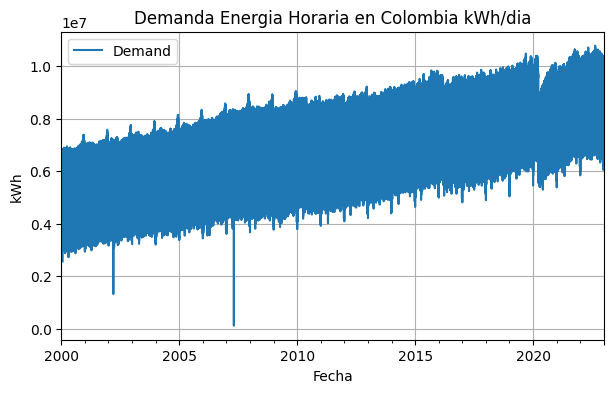

In [ ]:
# Generar un gráfico de línea a partir de los datos en df1
df1.plot(
    kind='line',
    figsize=(7, 4),
    title='Demanda Energia Horaria en Colombia kWh/dia',
    grid=True,
    ylabel='kWh',
    xlabel='Fecha',
    xlim=('2000-01-01', '2022-12-31')
)

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh/dia'}, xlabel='Fecha', ylabel='kWh'>

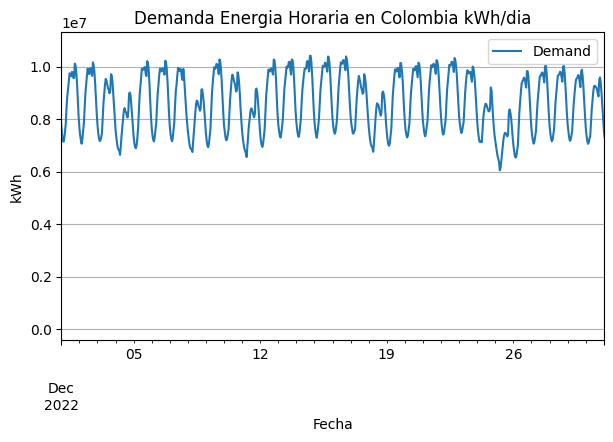

In [ ]:
# Generar un gráfico de línea para el período específico en df1
df1.plot(
    kind='line',
    figsize=(7, 4),
    title='Demanda Energia Horaria en Colombia kWh/dia',
    grid=True,
    ylabel='kWh',
    xlabel='Fecha',
    xlim=('2022-12-01', '2022-12-31')
)

In [ ]:
# Crear una nueva serie horaria a partir de df1 para el período específico
Ts1 = df1['2020-10-01':'2022-12-31'].values  # Un año
print('Tamaño Serie Horaria: ', len(Ts1))

Tamaño Serie Horaria:  19728


In [ ]:
# Normalizar la serie horaria Ts1 utilizando Min-Max Scaling
# Ts1 = (Ts1 - min(Ts1)) / (max(Ts1) - min(Ts1))

# Utilizar el escalador MinMaxScaler para normalizar Ts1
scaler = MinMaxScaler()
scaler.fit(Ts1)
Ts1 = scaler.transform(Ts1)

In [ ]:
# Definir el tamaño de paso (step_back)
step_back = 1

# Generar conjuntos de entrenamiento (X_train1, Y_train1) utilizando la función TrainingSet
X1, Y1 = TrainingSet(Ts1, step_back)

# Definir el tamaño de partición de entrenamiento y prueba (Part)
Part = 0.8

# Particionar los conjuntos de entrenamiento (X_train1, Y_train1) y prueba (X_test1, Y_test1)
X_test1 = X1[int(len(X1)*Part):]
X_train1 = X1[:int(len(X1)*Part)]
X_test1 = X_test1.reshape(len(X_test1), step_back)
X_train1 = X_train1.reshape(len(X_train1), step_back)

Y_test1 = Y1[int(len(Y1)*Part):]
Y_train1 = Y1[:int(len(Y1)*Part)]
Y_test1 = Y_test1.reshape(len(Y_test1), step_back)
Y_train1 = Y_train1.reshape(len(Y_train1), step_back)

In [ ]:
# Imprimir el tamaño de los conjuntos de entrenamiento y prueba
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape)
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape)
print('-----------------------------------------------------------------------')

Tamaño X_train1:  (15781, 1) Tamaño Y_train1:  (15781, 1)
Tamaño X_test1:  (3946, 1) Tamaño Y_test1:  (3946, 1)
-----------------------------------------------------------------------


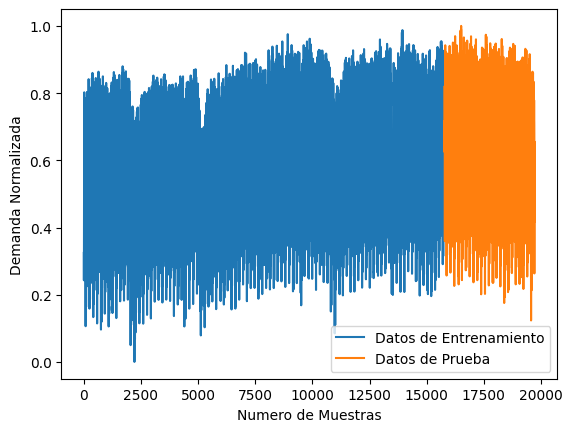

In [ ]:
# Generar gráfico de particiones de datos
xx = np.arange(len(X_train1), len(Ts1)-1)
plt.plot(X_train1, label='Datos de Entrenamiento')
plt.plot(xx, X_test1, label='Datos de Prueba')
# plt.xlim(15770, 15790)  # Opcional: Limitar el rango en el eje x
plt.xlabel('Número de Muestras')
plt.ylabel('Demanda Normalizada')
plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Opcional: Ajustar la ubicación de la leyenda
plt.show()

In [ ]:
# Caracteristicos de los modelos a probar
"""
    1. 'scaler': Estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
    2. 'reg': Clasificador
    3. 'scaler': Estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
    4. 'rep': reducción de dimensiones
    5. 'reg': Pueden utilizar clase generada tsne_map()
"""

kernels = [RBF(length_scale=0.001), RBF(length_scale=0.01),  RBF(length_scale=0.1),
           RBF(length_scale=1), RBF(length_scale=10), RBF(length_scale=100)]

models = [
            [('scaler', StandardScaler()),
            ('reg', LinearRegression())],
            [('scaler', StandardScaler()), #Ajustar según ejercicio
            ('reg', Lasso())],
            [('scaler', StandardScaler()),
            ('reg', ElasticNet())],
            [('scaler', StandardScaler()),
            ('reg', SGDRegressor())],
            [('scaler', StandardScaler()),
            ('reg', BayesianRidge())],
            [('scaler', StandardScaler()),
            ('reg', SVR())]
        ]

model_names = ['LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid', 'SVR']

# Parametros de búsqueda por malla
"""
    Parametros n_neighbors debe ser siempre un int
"""

parameters =[{'reg__n_jobs' : [-1, 1, 4]},
             {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000]},
             {'reg__alpha' : [ 0,1e-3,0.1,1,10,100],
              'reg__l1_ratio' : [0, 0,5, 1]},
             {'reg__alpha' : [ 0,1e-3,1e-2,0.1,1],
              'reg__l1_ratio' : [0,0.15, 1]},
             {'reg__alpha_1' : [1e-6, 1e-3, 1],
              'reg__alpha_2' : [1e-6, 1e-3, 1],
              'reg__lambda_1' : [1e-6, 1e-3, 1],
              'reg__lambda_2' : [1e-6, 1e-3, 1]},
             {'reg__kernel' : ['rbf', 'poly'],
              'reg__C' : [0.1, 0.5, 1],
              'reg__epsilon' : [1e-3, 0.1],
              'reg__max_iter' : [10000]}
             ]

In [ ]:
# Inicializar lista para guardar los resultados de pronóstico de cada modelo
forecasting_ML = []

# Iterar a través de los diferentes modelos
for j in range(len(models)):
    # Seleccionar modelo y parámetros correspondientes
    method = models[j]
    parameter = parameters[j]

    # Imprimir información sobre el modelo actual
    print("Model: {model}".format(model=model_names[j]))

    # Crear un modelo utilizando GridSearchCV para búsqueda de hiperparámetros
    model = GridSearchCV(Pipeline(method),
                         parameter,
                         cv=5,
                         verbose=5,
                         n_jobs=-1,
                         scoring='neg_mean_absolute_error')

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train1, Y_train1)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test1)

    # Agregar las predicciones a la lista de resultados
    forecasting_ML.append(y_pred)

Model: LinearR
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: Elastic
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model: SGDReg
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Model: BayesRid
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits


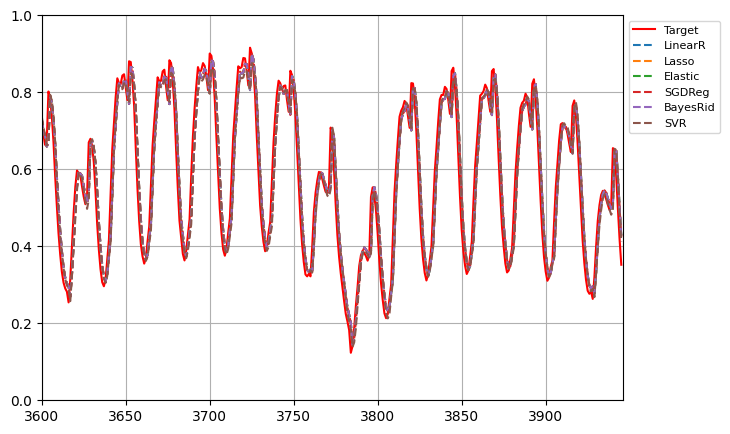

╒═════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╕
│ Metrics     │    LinearR │      Lasso │    Elastic │     SGDReg │   BayesRid │        SVR │
╞═════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ MSE         │ 0.0611     │ 0.0611     │ 0.0611     │ 0.06109    │ 0.0611     │ 0.06183    │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ RMSE        │ 0.00373327 │ 0.00373327 │ 0.00373327 │ 0.0037321  │ 0.00373327 │ 0.00382266 │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ MAE         │ 0.05118    │ 0.05118    │ 0.05118    │ 0.05118    │ 0.05118    │ 0.05112    │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ R2          │ 0.90741    │ 0.90741    │ 0.90741    │ 0.90743    │ 0.90741    │ 0.90519    │
├─────────────┼────────────┼────────────┼────────────┼──────

In [ ]:
# Generar gráfica de los resultados de pronóstico
plt.figure(figsize=(7.5, 5))
plt.plot(Y_test1, label='Target', c='r')
for i in range(len(forecasting_ML)):
    plt.plot(forecasting_ML[i], label=model_names[i], linestyle='--')
plt.xlim(3600, len(forecasting_ML[i]))
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

# Definir nombres de columnas y listas para métricas
col_names = ['Metrics', 'LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid', 'SVR']
MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ["MSE"], ["RMSE"], ["MAE"], ["R2"], ['cnSMAPE'], ['P_Value_PS'], ['P_Value_TT'], ['P_Value_Var']

# Calcular métricas para cada modelo y almacenarlas en las listas correspondientes
for k in range(6):
    MSE.append(round(mean_squared_error(Y_test1, forecasting_ML[k], squared=False), 5))
    RMSE.append(mean_squared_error(Y_test1, forecasting_ML[k], squared=True))
    MAE.append(round(mean_absolute_error(Y_test1, forecasting_ML[k]), 5))
    R2.append(round(r2_score(Y_test1, forecasting_ML[k]), 5))
    mape = mean_absolute_percentage_error(Y_test1, forecasting_ML[k])
    smape = 2 * mape * 100 / (100 - mape)
    cnSMAPE.append(round(1 - (smape / 2), 5))
    correlation, p_value1 = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_ML[k].reshape(len(Y_test1)))
    P_Value_PS.append(p_value1)
    correlation, p_value2 = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_ML[k].reshape(len(Y_test1)))
    P_Value_TT.append(p_value2)
    statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_ML[k].reshape(len(Y_test1)))
    P_Value_Var.append(p_value3)

# Crear una tabla con las métricas calculadas y mostrarla
tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]
print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))

In [ ]:
# Definir el tamaño de la ventana deslizante
step_back = 24

# Generar conjuntos de entrenamiento y etiquetas utilizando la función TrainingSet
X1, Y1 = TrainingSet(Ts1, step_back)

# Definir el tamaño de la partición de entrenamiento y prueba
Part = 0.8

# Dividir los conjuntos de entrenamiento y prueba
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
X_test1 = X_test1.reshape(len(X_test1), step_back)
X_train1 = X_train1.reshape(len(X_train1), step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
Y_test1 = Y_test1.reshape(len(Y_test1), 1)
Y_train1 = Y_train1.reshape(len(Y_train1), 1)

In [ ]:
# Inicializar una lista para almacenar los resultados de pronóstico de los diferentes modelos
forecasting_ML2 = []

# Iterar a través de los modelos
for j in range(len(models)):
    # Seleccionar el modelo y sus parámetros correspondientes
    method = models[j]
    parameter = parameters[j]

    # Imprimir el nombre del modelo
    print("Model: {model}".format(model=model_names[j]))

    # Crear un modelo utilizando GridSearchCV para búsqueda de hiperparámetros
    model = GridSearchCV(Pipeline(method),
                         parameter,
                         cv=5,
                         verbose=5,
                         n_jobs=-1,
                         scoring='neg_mean_absolute_error')

    # Entrenar el modelo utilizando los conjuntos de entrenamiento
    model.fit(X_train1, Y_train1)

    # Realizar pronósticos en el conjunto de prueba
    y_pred = model.predict(X_test1)

    # Agregar los resultados del pronóstico a la lista
    forecasting_ML2.append(y_pred)

Model: LinearR
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: Elastic
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model: SGDReg
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Model: BayesRid
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits


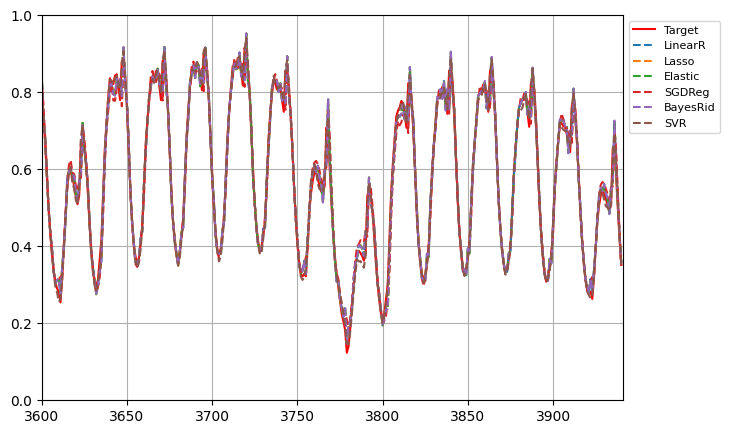

╒═════════════╤═════════════╤═════════════╤═════════════╤════════════╤════════════╤═════════════╕
│ Metrics     │     LinearR │       Lasso │     Elastic │     SGDReg │   BayesRid │         SVR │
╞═════════════╪═════════════╪═════════════╪═════════════╪════════════╪════════════╪═════════════╡
│ MSE         │ 0.02586     │ 0.02595     │ 0.02595     │ 0.03237    │ 0.02586    │ 0.01232     │
├─────────────┼─────────────┼─────────────┼─────────────┼────────────┼────────────┼─────────────┤
│ RMSE        │ 0.000668558 │ 0.000673258 │ 0.000673258 │ 0.00104764 │ 0.00066872 │ 0.000151701 │
├─────────────┼─────────────┼─────────────┼─────────────┼────────────┼────────────┼─────────────┤
│ MAE         │ 0.01951     │ 0.01958     │ 0.01958     │ 0.02375    │ 0.01951    │ 0.00919     │
├─────────────┼─────────────┼─────────────┼─────────────┼────────────┼────────────┼─────────────┤
│ R2          │ 0.98344     │ 0.98332     │ 0.98332     │ 0.97405    │ 0.98343    │ 0.99624     │
├─────────────┼─────

In [ ]:
# Crear una figura para mostrar las gráficas de pronóstico y el objetivo real
plt.figure(figsize=(7.5, 5))
plt.plot(Y_test1, label='Target', c='r')

# Iterar a través de los resultados de pronóstico y agregar las líneas correspondientes a la gráfica
for i in range(len(forecasting_ML2)):
    plt.plot(forecasting_ML2[i], label=model_names[i], linestyle='--')

# Ajustar los límites de la gráfica
plt.xlim(3600, len(forecasting_ML2[i]))
plt.ylim(0, 1)

# Agregar leyendas y detalles a la gráfica
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

# Definir nombres de columnas y listas para almacenar métricas de rendimiento
col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics', 'LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid', 'SVR'], ["MSE"], ["RMSE"], ["MAE"], ["R2"], ['cnSMAPE'], ['P_Value_PS'], ['P_Value_TT'], ['P_Value_Var']

# Calcular métricas de rendimiento y p-values para cada modelo
for k in range(6):
    MSE.append(round(mean_squared_error(Y_test1, forecasting_ML2[k], squared=False), 5))
    RMSE.append(mean_squared_error(Y_test1, forecasting_ML2[k], squared=True))
    MAE.append(round(mean_absolute_error(Y_test1, forecasting_ML2[k]), 5))
    R2.append(round(r2_score(Y_test1, forecasting_ML2[k]), 5))
    mape = mean_absolute_percentage_error(Y_test1, forecasting_ML2[k])
    smape = 2 * mape * 100 / (100 - mape)
    cnSMAPE.append(round(1 - (smape / 2), 5))
    correlation, p_value4 = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
    P_Value_PS.append(p_value4)
    correlation, p_value5 = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
    P_Value_TT.append(p_value5)
    statistic, p_value6 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
    P_Value_Var.append(p_value6)

# Crear una tabla con las métricas de rendimiento y p-values
tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

# Mostrar la tabla
print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))